# İnstall Keras and Tensorflow

In [25]:
# pip install tensorflow

In [26]:
# pip install keras 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential

model = Sequential()

In [3]:
from keras.datasets import boston_housing

(X_train , y_train) , (X_test , y_test) = boston_housing.load_data()

print("X Train küme boyutu : {} ".format(X_train.shape))

print("X Test küme boyutu : {} ".format(X_test.shape))

print("Y Train küme boyutu : {} ".format(y_train.shape))

print("Y Test küme boyutu : {} ".format(y_test.shape))

X Train küme boyutu : (404, 13) 
X Test küme boyutu : (102, 13) 
Y Train küme boyutu : (404,) 
Y Test küme boyutu : (102,) 


##### 13 adet Feature var !! 

In [4]:
from keras.layers import Dense 

girdi_adedi = X_train.shape[1] # == 13 

model = Sequential()

model.add(Dense(8 , activation = "relu", input_shape = (girdi_adedi,), name= "Hidden_Layer_1")) # Layer 
model.add(Dense(4 , activation= "relu", name="Hidden_Layer_2"))
model.add(Dense(1, name = "Cikti"))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 8)                 112       
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 4)                 36        
_________________________________________________________________
Cikti (Dense)                (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


Modelimizde tahmin edilmesi gereken 153 parametre (ağırlık ve bias) bulunmakta. İlk katman için bakacak olursak (13 (değişken sayısı) + 1 (bias)) * 8 (nöron sayısı) = 112 parametre hesaplanması gerekmektedir.

# Derleme (compile)

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae"])

In [7]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 1ms/step - loss: 2786.8853 - mae: 50.4439
Epoch 2/10
13/13 [==============================] - 0s 913us/step - loss: 2124.0149 - mae: 44.0435
Epoch 3/10
13/13 [==============================] - 0s 846us/step - loss: 1686.4717 - mae: 38.8075
Epoch 4/10
13/13 [==============================] - 0s 846us/step - loss: 1420.8362 - mae: 35.0796
Epoch 5/10
13/13 [==============================] - 0s 846us/step - loss: 1237.3772 - mae: 32.3601
Epoch 6/10
13/13 [==============================] - 0s 922us/step - loss: 1102.7704 - mae: 30.2641
Epoch 7/10
13/13 [==============================] - 0s 999us/step - loss: 1000.1252 - mae: 28.6325
Epoch 8/10
13/13 [==============================] - 0s 983us/step - loss: 920.9815 - mae: 27.3749
Epoch 9/10
13/13 [==============================] - 0s 922us/step - loss: 859.7997 - mae: 26.3612
Epoch 10/10
13/13 [==============================] - 0s 999us/step - loss: 803.6060 - mae: 25.3706


In [8]:
tahmin = model.predict(X_test[15].reshape(1,13))
print("Gerçek değer        : ", y_test[15])
print("Tahmin edilen değer : ", tahmin[0][0])

Gerçek değer        :  24.3
Tahmin edilen değer :  -4.262124


In [9]:
mae_egitim = model.evaluate(X_train, y_train)[1]
mae_test = model.evaluate(X_test, y_test)[1]

print("\nEğitim kümesi MAE değeri : {:.3f}".format(mae_egitim))
print("Test kümesi MAE değeri   : {:.3f}".format(mae_test))

4/4 [==============================] - 0s 1ms/step - loss: 757.3970 - mae: 24.0624

Eğitim kümesi MAE değeri : 24.814
Test kümesi MAE değeri   : 24.062


# Keras ile regresyon
- Yukarıda keras ile modelleme aşamalarına bakarken aslında bir regresyon modelini gördük. Şimdi nöron sayılarını artırarak yeni bir model oluşturalım.

In [10]:
from keras.layers import Dense 

girdi_adedi = X_train.shape[1] # Column sayısı 

model = Sequential()

model.add(Dense(100 , activation= "relu" , input_shape= (girdi_adedi,), name= "Hidden_Layer_1"))
model.add(Dense(50, activation="relu", name= "Hidden_Layer_2"))
model.add(Dense(1, name="Cikti")) # Kaç  adet Çıktı üretmesini istiyorsun.? 

model.compile(optimizer= "adam", loss= "mean_squared_error", metrics= ['mae'])

model.fit(X_train , y_train , epochs = 20 , verbose=0)

In [11]:
mae_train = model.evaluate(X_train , y_train)[1]
mae_test = model.evaluate(X_test, y_test)[1]

print("\nTrain Kümesi MAE Değeri :  {:.3f}".format(mae_train))
print("Test Kümesi MAE Değeri : {:.3f}".format(mae_test))

4/4 [==============================] - 0s 1ms/step - loss: 41.0866 - mae: 4.4179

Train Kümesi MAE Değeri :  4.127
Test Kümesi MAE Değeri : 4.418


In [12]:
tahmin_test = model.predict(X_test)
tahmin_egitim = model.predict(X_train)

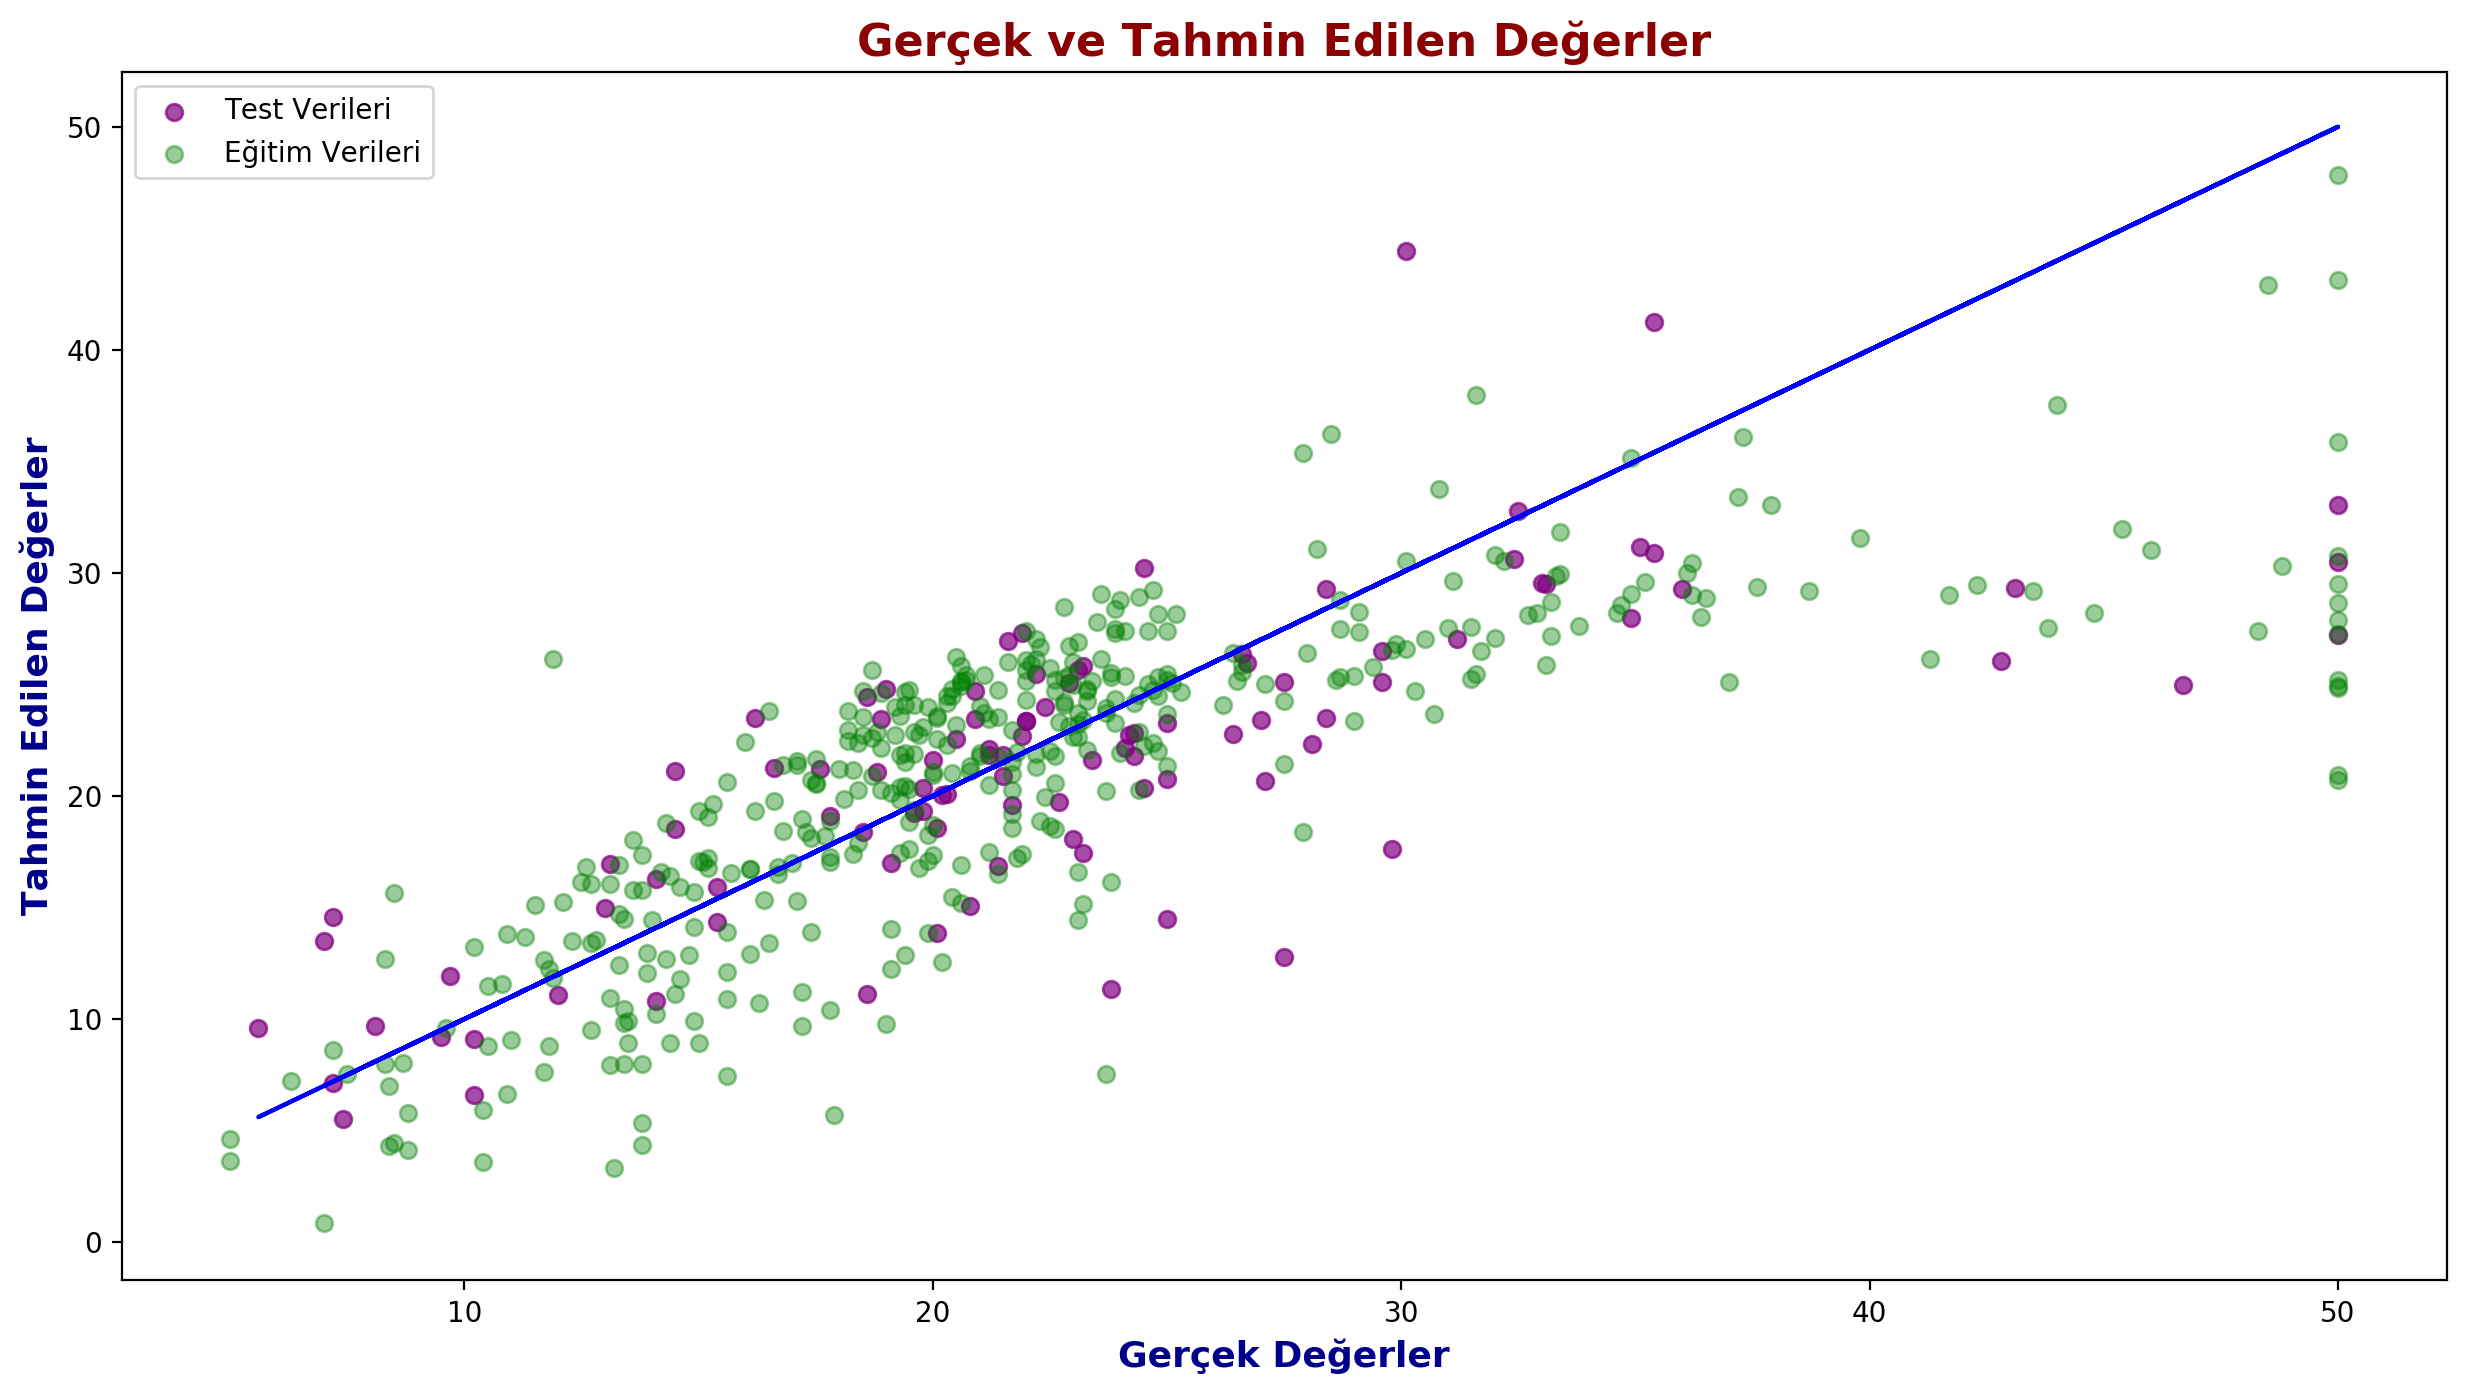

In [13]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 13 }

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8), dpi=200)
ax1 = plt.scatter(y_test,tahmin_test,alpha=0.7,color="purple", )
ax2 = plt.scatter(y_train,tahmin_egitim,alpha=0.4,color="green")
ax3 = plt.plot(y_test,y_test,color="blue")
plt.xlabel("Gerçek Değerler",color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Tahmin Edilen Değerler",color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("Gerçek ve Tahmin Edilen Değerler", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Verileri", 'Eğitim Verileri'])
plt.show()

# Homework

In [26]:
from keras import models
from keras import layers

(X_train , y_train) , (X_test , y_test) = boston_housing.load_data()

def build_model_2(a):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(a.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X_train , y_train , epochs = 20 , verbose=0)
    return model

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
build_model_2(X_train)

In [29]:
mae_train = model.evaluate(X_train , y_train)[1]
mae_test = model.evaluate(X_test, y_test)[1]

print("\nTrain Kümesi MAE Değeri :  {:.3f}".format(mae_train))
print("Test Kümesi MAE Değeri : {:.3f}".format(mae_test))

4/4 [==============================] - 0s 1ms/step - loss: 18.0641 - mae: 3.0345

Train Kümesi MAE Değeri :  1.514
Test Kümesi MAE Değeri : 3.034


# K-fold Validation

In [30]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [31]:
import numpy as np
k=4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]],axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Train set K-fold Validation Score 

In [37]:
print(all_scores)
print("\n Mean:",np.mean(all_scores))

[2.354243755340576, 2.38557505607605, 2.4956986904144287, 2.4756662845611572]

 Mean: 2.427795946598053


In [38]:
mae_train = model.evaluate(X_train , y_train)[1]
mae_test = model.evaluate(X_test, y_test)[1]

print("\nTrain Kümesi MAE Değeri :  {:.3f}".format(mae_train))
print("Test Kümesi MAE Değeri : {:.3f}".format(mae_test))

4/4 [==============================] - 0s 1ms/step - loss: 18.7184 - mae: 2.7206

Train Kümesi MAE Değeri :  1.484
Test Kümesi MAE Değeri : 2.721


In [39]:
tahmin_test = model.predict(X_test)
tahmin_egitim = model.predict(X_train)

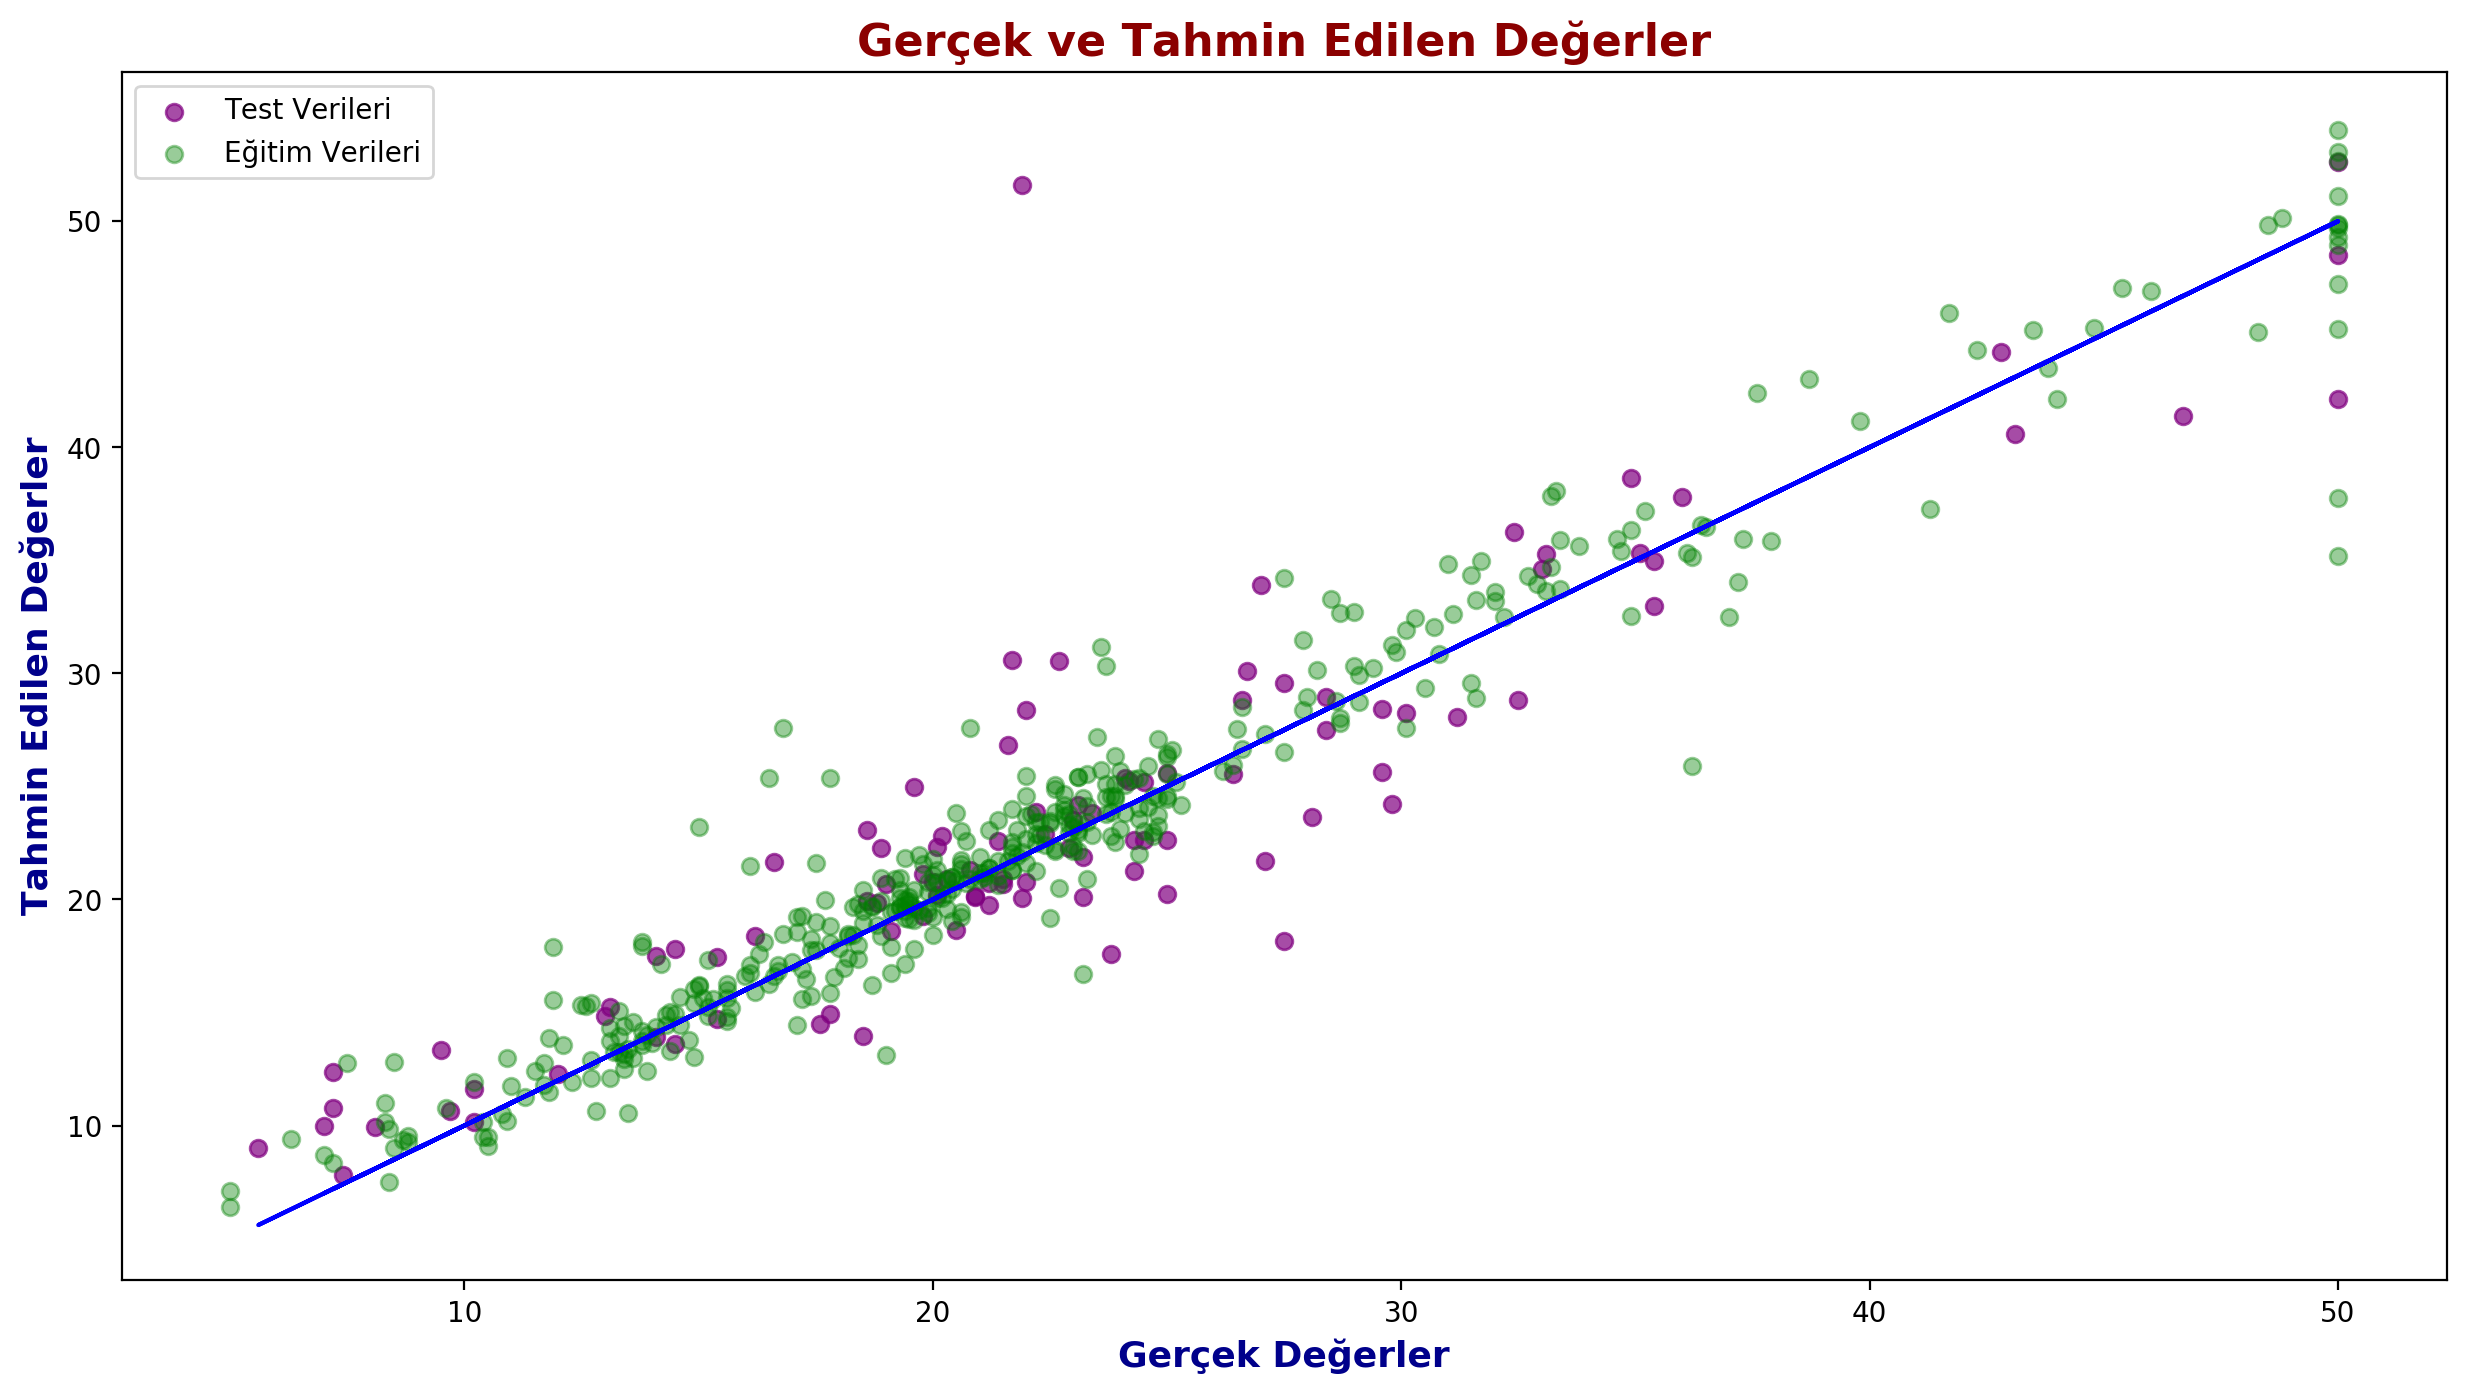

In [40]:
plt.figure(figsize=(15,8), dpi=200)
ax1 = plt.scatter(y_test,tahmin_test,alpha=0.7,color="purple", )
ax2 = plt.scatter(y_train,tahmin_egitim,alpha=0.4,color="green")
ax3 = plt.plot(y_test,y_test,color="blue")
plt.xlabel("Gerçek Değerler",color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Tahmin Edilen Değerler",color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("Gerçek ve Tahmin Edilen Değerler", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Verileri", 'Eğitim Verileri'])
plt.show()